In [18]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df_logprobs = pd.read_csv("../tom-tasks-private/preprocessed_logprobs.tsv", sep = "\t")

In [20]:
df_logprobs.columns

Index(['item_id', 'logprob', 'EleutherAI__pythia-14m___main',
       'meta-llama__Meta-Llama-3-8B-Instruct___main',
       'EleutherAI__pythia-31m___main', 'allenai__OLMo-2-1124-13B-DPO___main',
       'allenai__OLMo-2-1124-13B___main', 'EleutherAI__pythia-6.9b___main',
       'meta-llama__Meta-Llama-3-8B___main', 'EleutherAI__pythia-2.8b___main',
       'allenai__OLMo-2-1124-13B-SFT___main',
       'mistralai__Mistral-Nemo-Base-2407___main',
       'EleutherAI__pythia-12b___main',
       'nvidia__Llama-3.1-Nemotron-Nano-8B-v1___main',
       'EleutherAI__pythia-160m___main',
       'allenai__OLMo-2-1124-13B-Instruct___main',
       'EleutherAI__pythia-70m___main', 'EleutherAI__pythia-410m___main',
       'mistralai__Mistral-Nemo-Instruct-2407___main',
       'EleutherAI__pythia-1b___main', 'EleutherAI__pythia-1.4b___main'],
      dtype='object')

In [21]:
df_logprobs

,item_id,logprob,EleutherAI__pythia-14m___main,meta-llama__Meta-Llama-3-8B-Instruct___main,EleutherAI__pythia-31m___main,allenai__OLMo-2-1124-13B-DPO___main,allenai__OLMo-2-1124-13B___main,EleutherAI__pythia-6.9b___main,meta-llama__Meta-Llama-3-8B___main,EleutherAI__pythia-2.8b___main,...,mistralai__Mistral-Nemo-Base-2407___main,EleutherAI__pythia-12b___main,nvidia__Llama-3.1-Nemotron-Nano-8B-v1___main,EleutherAI__pythia-160m___main,allenai__OLMo-2-1124-13B-Instruct___main,EleutherAI__pythia-70m___main,EleutherAI__pythia-410m___main,mistralai__Mistral-Nemo-Instruct-2407___main,EleutherAI__pythia-1b___main,EleutherAI__pythia-1.4b___main
0,10_fb_1_e_e_ex,end_logprob,-4.468750,-1.085938,-4.195312,-3.531250,-2.383868,-0.591309,-1.046875,-0.791992,...,-1.335938,-1.282227,-0.001305,-1.138672,-3.625000,-2.703125,-3.367188,-1.617188,-1.466797,-0.930664
1,10_fb_1_e_e_ex,start_logprob,-3.494141,-0.460938,-4.218750,-0.034180,-0.134672,-1.286133,-0.546875,-0.910645,...,-0.361328,-0.448975,-9.625000,-2.730469,-0.030151,-2.761719,-0.158447,-0.249023,-0.396484,-0.791992
2,10_fb_1_e_e_im,end_logprob,-4.343750,-0.167969,-2.548828,-0.217773,-0.341798,-0.261963,-0.457031,-0.214600,...,-0.718750,-0.258789,-0.000504,-0.739258,-0.162109,-2.064453,-1.920898,-0.523438,-1.459961,-0.327148
3,10_fb_1_e_e_im,start_logprob,-2.367188,-1.921875,-4.574219,-1.906250,-1.301495,-1.642578,-1.078125,-1.997070,...,-0.734375,-1.699219,-13.187500,-2.835938,-2.250000,-5.128906,-0.387939,-0.968750,-0.320312,-1.470703
4,10_fb_1_e_s_ex,end_logprob,-3.826172,-4.281250,-4.312500,-2.750000,-1.724325,-1.344727,-2.500000,-1.226562,...,-2.250000,-1.182617,-0.001236,-0.794922,-3.015625,-2.835938,-3.386719,-2.593750,-1.914062,-1.158203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,9_tb_1_s_e_im,end_logprob,-0.561523,-0.213867,-0.629395,-0.542969,-0.445898,-0.637695,-0.104004,-1.955078,...,-0.570312,-0.514648,-1.664062,-1.383789,-0.447266,-2.109375,-1.498047,-0.714844,-1.833008,-0.734375
380,9_tb_1_s_s_ex,start_logprob,-4.023438,-1.664062,-2.943359,-1.101562,-0.872088,-1.476562,-1.039062,-0.935059,...,-0.425781,-1.240234,-0.202148,-1.996094,-1.289062,-2.218750,-0.594727,-0.625000,-0.607910,-0.983398
381,9_tb_1_s_s_ex,end_logprob,-3.005859,-0.289062,-3.935547,-1.851562,-0.875946,-1.163086,-0.535156,-1.012695,...,-1.171875,-1.175781,-2.828125,-1.487305,-2.015625,-3.189453,-2.343750,-0.875000,-1.301758,-1.583008
382,9_tb_1_s_s_im,start_logprob,-4.386719,-2.515625,-4.324219,-3.296875,-2.765667,-1.131836,-2.062500,-0.308350,...,-0.617188,-0.860352,-0.053467,-1.135742,-3.765625,-3.154297,-0.428955,-0.898438,-0.222656,-0.596680


In [22]:
df_subset = df_logprobs[['item_id', 'logprob', 'meta-llama__Meta-Llama-3-8B-Instruct___main']]

In [23]:
# df_subset = df_logprobs[['item_id', 'logprob', 'meta-llama__Meta-Llama-3-8B___main']]

In [24]:
df_subset.columns

Index(['item_id', 'logprob', 'meta-llama__Meta-Llama-3-8B-Instruct___main'], dtype='object')

In [25]:
df_wide = df_subset.pivot(index='item_id', 
                   columns='logprob', 
                   values='meta-llama__Meta-Llama-3-8B-Instruct___main').reset_index()
df_wide.head(3)

logprob,item_id,end_logprob,start_logprob
0,10_fb_1_e_e_ex,-1.085938,-0.460938
1,10_fb_1_e_e_im,-0.167969,-1.921875
2,10_fb_1_e_s_ex,-4.281250,-0.026245


In [26]:
df_wide['log_odds_local'] = df_wide['start_logprob'] - df_wide['end_logprob']

In [27]:
df_passages = pd.read_csv("data/raw/fb.csv")[['item_id', 'passage', 'condition']]
df_passages.head(3)

,item_id,passage,condition
0,7_fb_1_s_e_ex,David and Marta go out to get some wine for th...,False Belief
1,7_fb_1_s_e_im,David and Marta go out to get some wine for th...,False Belief
2,7_tb_1_s_e_ex,David and Marta go out to get some wine for th...,True Belief


In [28]:
df_merged = pd.merge(df_passages, df_wide)

In [29]:
df_merged.shape

(192, 6)

In [30]:
df_llama = pd.read_csv("data/processed/fb/fb-Meta-Llama-3-8B-Instruct.csv")[['passage', 'lp_start', 'lp_end', 'log_odds', 'condition', 'start', 'end']]

In [31]:
df_all = pd.merge(df_merged, df_llama)
df_all.shape

(192, 11)

Text(0, 0.5, 'HF endpoint estimation')

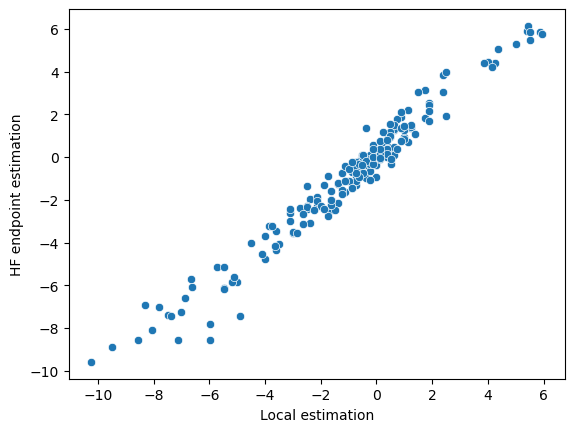

In [32]:
sns.scatterplot(data = df_all, x = "log_odds_local", y = "log_odds")
plt.xlabel("Local estimation")
plt.ylabel("HF endpoint estimation")

In [33]:
ss.pearsonr(df_all['log_odds_local'], df_all['log_odds'])

PearsonRResult(statistic=0.9805804157962643, pvalue=2.230986121138381e-136)

In [37]:
df_all['end_diff'] = np.abs(df_all['log_odds'] - df_all['log_odds_local'])

(array([69., 48., 45., 15.,  5.,  5.,  2.,  1.,  0.,  2.]),
 array([0.        , 0.25593109, 0.51186218, 0.76779327, 1.02372437,
        1.27965546, 1.53558655, 1.79151764, 2.04744873, 2.30337982,
        2.55931091]),
 <BarContainer object of 10 artists>)

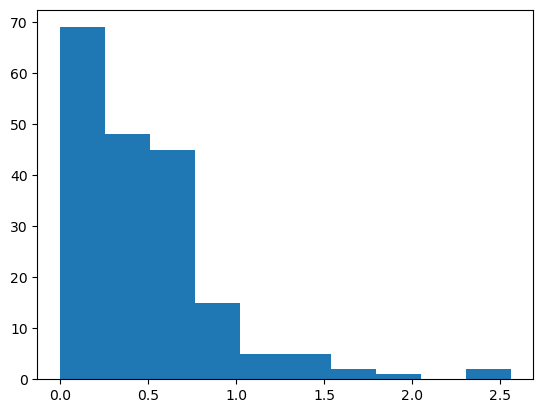

In [38]:
plt.hist(df_all['end_diff'])